In [5]:
import numpy as np

X = 2*np.random.rand(100, 1)

y  = 4 + 3*X + np.random.randn(100, 1)

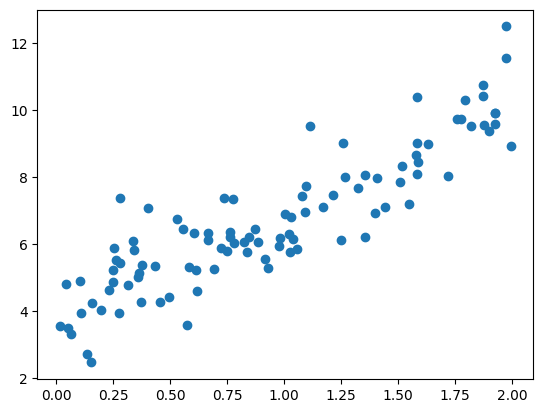

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [11]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.77837985],
       [3.10612919]])

# What does np.c_ do?

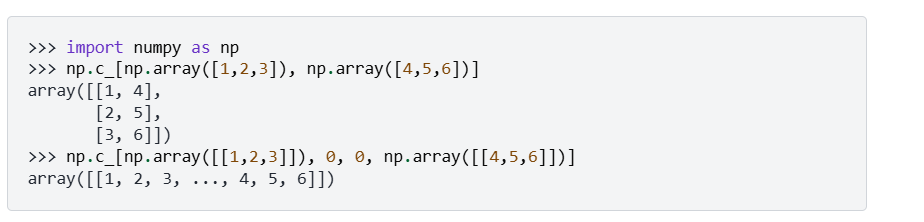

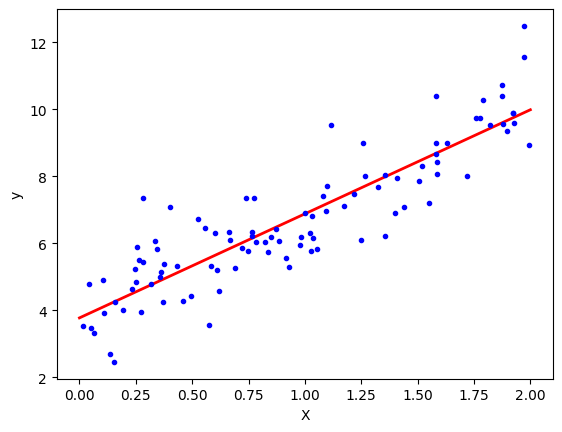

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.77837985]), array([[3.10612919]]))

In [18]:
lin_reg.predict(X_new)

array([[3.77837985],
       [9.99063822]])

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=None)
theta_best_svd

array([[3.77837985],
       [3.10612919]])

# Gradient Descent

In [20]:
eta = 0.1
n_iterations = 1000

m = 100

theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.77837985],
       [3.10612919]])

In [ ]:
n_epoch = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients